In [3]:
%load_ext autoreload
%autoreload 2  

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from optics_calcs.opticscalcs import deltaKZ
from optics_calcs.aqueous import debyeLength

In [5]:
conc = np.array([2e-6, 1.2e-5, 1e-4,1e-3,1e-2,1e-1])

amp = np.array([1.3362,1.4231,1.8254,1.59271,1.39123,1])
ampstd = np.array([0.0299,0.0993,0.22400,0.01983,0.0118,0])

phisig = np.array([18.881,18.553,12.472,5.3364,3.9289,0])
phisigstd = np.array([0.355,0.8721,0.5124,0.39409,0.54163,0])

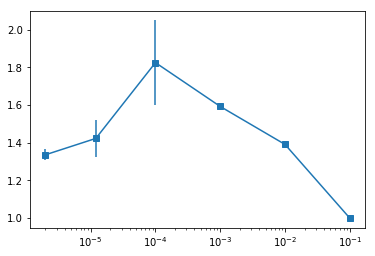

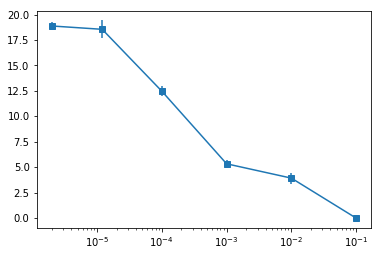

In [6]:
plt.figure()
plt.errorbar(conc,amp,ampstd,marker='s')
plt.xscale("log")

plt.figure()
plt.errorbar(conc,phisig,phisigstd,marker='s')
plt.xscale("log")

In [7]:
dkz = deltaKZ(1030,1030,60,60,'fusedsilica','water')
print(dkz)

kappa = 1/debyeLength(conc)
print(kappa)

phidc = np.arctan(dkz/kappa)
print(np.degrees(phidc))

10698661.81993063
[4.66374937e+06 1.14238062e+07 3.29776880e+07 1.04284606e+08
 3.29776880e+08 1.04284606e+09]
[66.44670076 43.12259446 17.97416298  5.85753853  1.85814496  0.5877825 ]


In [8]:
chi3pot = (np.sin(np.radians(phisig))*amp)/(np.cos(phidc)*np.sin(phidc))

chi2 = np.cos(np.radians(phisig))*amp - np.cos(phidc)**2*chi3pot

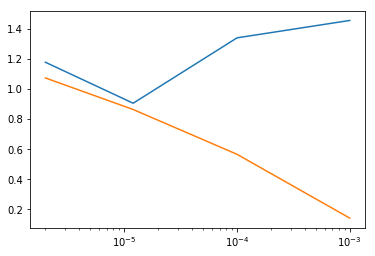

In [9]:
plt.figure()
plt.plot(conc[:-2],chi3pot[:-2])
plt.plot(conc[:-2],chi2[:-2])
plt.xscale("log")

[1.18041675 0.90755701 1.34303484 1.45905663]
[0.03398553 0.07552712 0.17352338 0.10896367]
[1.0758117  0.86564605 0.56718141 0.14194678]
[0.04430106 0.12088865 0.27921067 0.11074271]
[2.0e-06 1.2e-05 1.0e-04 1.0e-03 1.0e-02 1.0e-01]


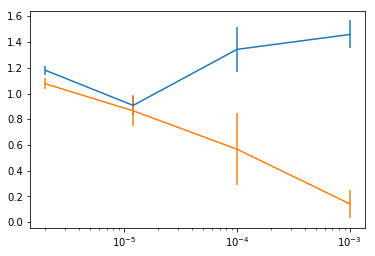

In [10]:
fracphi = np.divide(phisigstd[:4],phisig[:4])
fracamp = np.divide(ampstd[:4],amp[:4])

errorSin = np.cos(np.radians(phisig[:4]))*np.radians(phisigstd[:4])

fracErrorchi3pot = np.sqrt((errorSin/np.sin(np.radians(phisig[:4])))**2 + fracamp**2)
errorchi3pot = fracErrorchi3pot*chi3pot[:4]

errorCos = np.sin(np.radians(phisig[:4]))*np.radians(phisigstd[:4])

errorchi2 = np.sqrt(errorchi3pot**2 + (np.sqrt(((errorCos/np.cos(np.radians(phisig[:4])))**2 + fracamp**2))*np.cos(np.radians(phisig[:4]))*amp[:4])**2)


plt.figure()
plt.errorbar(conc[:-2],chi3pot[:-2],errorchi3pot)
plt.errorbar(conc[:-2],chi2[:-2],errorchi2)

plt.xscale("log")

print(chi3pot[:-2])
print(errorchi3pot)

print(chi2[:-2])
print(errorchi2)

print(conc)


In [18]:
calcphidc = np.arctan((np.sin(np.radians(phisig[:4]))*amp[:4])/(np.cos(np.radians(phisig[:4]))*amp[:4]-1))
print(np.degrees(calcphidc))

calckappa = dkz/np.tan(calcphidc)
print(1/calckappa)
print(1/kappa[:4])

[58.56476695 52.36548383 26.74383001 14.19035865]
[1.52916313e-07 1.21221658e-07 4.70999518e-08 2.36347186e-08]
[2.14419756e-07 8.75364987e-08 3.03235327e-08 9.58914299e-09]


In [23]:
errorSin = np.cos(np.radians(phisig[:4]))*np.radians(phisigstd[:4])
fracErrorSin = errorSin/np.sin(np.radians(phisig[:4]))

fracErrorAmp = np.divide(ampstd[:4],amp[:4])

errorCos = np.sin(np.radians(phisig[:4]))*np.radians(phisigstd[:4])
fracErrorCos = errorCos/np.cos(np.radians(phisig[:4]))

totalFracFrac = np.sqrt(fracErrorSin**2+fracErrorAmp**2+fracErrorCos**2)
totalFrac = totalFracFrac*(np.sin(np.radians(phisig[:4]))*amp[:4])/(np.cos(np.radians(phisig[:4]))*amp[:4]-1)

errorArcTan = (1/np.cos(2*(np.sin(np.radians(phisig[:4]))*amp[:4])/(np.cos(np.radians(phisig[:4]))*amp[:4]-1)))*totalFrac
print(np.degrees(errorArcTan))

[-2.72923578 -7.25737965  6.99016746  1.23681995]
